In [531]:
from pyspark.sql import SparkSession
from pyspark.sql.types import FloatType, StringType
from pyspark.sql.functions import udf, col, asc,desc, sum

In [2]:
!pip3 install pyspark

     |████████████████████████████████| 281.3 MB 35 kB/s 
     |████████████████████████████████| 198 kB 4.6 MB/s 
  Created wheel for pyspark: filename=pyspark-3.2.0-py2.py3-none-any.whl size=281805912 sha256=0ce9e51fad07aa8e6c59f0c40b710e0d1c1bb5152201ed22f95b8a6cc2bcfd40
  Stored in directory: /root/.cache/pip/wheels/0b/de/d2/9be5d59d7331c6c2a7c1b6d1a4f463ce107332b1ecd4e80718
Successfully built pyspark


In [4]:
import pandas as pd
import numpy as np

In [5]:
spark = SparkSession.builder.getOrCreate()

In [6]:
spark

# Task 1
Narysuj wykres zależności kolumn Plot Infant mortality vs. Literacy dla 30 najbogatszych i 30 najbiedniejszych krajów


In [25]:
countries_path= '/content/drive/MyDrive/ADZD/countries of the world.csv'  

In [26]:
def to_float(s):
  return float(s.replace(',', '.'))

In [27]:
float_udf = udf(to_float, FloatType())

In [28]:
def to_percent(s):
  return float(s.replace(',', '.'))/10

In [29]:
percent_udf = udf(to_percent, FloatType())

In [30]:
countries = spark.read.csv(countries_path,header=True, inferSchema=True)

print(countries.show())

+------------------+--------------------+----------+--------------+--------------------------+----------------------------+-------------+----------------------------------+------------------+------------+-----------------+----------+---------+---------+-------+---------+---------+-----------+--------+-------+
|           Country|              Region|Population|Area (sq. mi.)|Pop. Density (per sq. mi.)|Coastline (coast/area ratio)|Net migration|Infant mortality (per 1000 births)|GDP ($ per capita)|Literacy (%)|Phones (per 1000)|Arable (%)|Crops (%)|Other (%)|Climate|Birthrate|Deathrate|Agriculture|Industry|Service|
+------------------+--------------------+----------+--------------+--------------------------+----------------------------+-------------+----------------------------------+------------------+------------+-----------------+----------+---------+---------+-------+---------+---------+-----------+--------+-------+
|      Afghanistan |ASIA (EX. NEAR EA...|  31056997|        647500|

In [92]:
full_countries = countries.select('Country', 'Literacy (%)', 'Infant mortality (per 1000 births)', 'GDP ($ per capita)').na.drop()
full_countries = full_countries.withColumn("Literacy", float_udf("Literacy (%)"))
full_countries = full_countries.withColumn("Infant mortality (%)", percent_udf("Infant mortality (per 1000 births)"))
# richest.sort("GDP ($ per capita)").show()

In [34]:
full_countries_s = full_countries.sort('GDP ($ per capita)')

In [35]:
countries_df = full_countries_s.toPandas()

In [36]:
countries_df

,Country,Literacy (%),Infant mortality (per 1000 births),GDP ($ per capita),Literacy,Infant mortality (%)
0,East Timor,"58,6","47,41",500,58.599998,4.741
1,Sierra Leone,"31,4","143,64",500,31.400000,14.364
2,Somalia,"37,8","116,7",500,37.799999,11.670
3,Burundi,"51,6","69,29",600,51.599998,6.929
4,Malawi,"62,7","103,32",600,62.700001,10.332
...,...,...,...,...,...,...
202,Cayman Islands,"98,0","8,19",35000,98.000000,0.819
203,Bermuda,"98,0","8,53",36000,98.000000,0.853
204,Norway,"100,0","3,7",37800,100.000000,0.370
205,United States,"97,0","6,5",37800,97.000000,0.650


In [37]:
poorest = countries_df.head(30)

In [38]:
poorest

,Country,Literacy (%),Infant mortality (per 1000 births),GDP ($ per capita),Literacy,Infant mortality (%)
0,East Timor,"58,6","47,41",500,58.599998,4.741000
1,Sierra Leone,"31,4","143,64",500,31.400000,14.364000
2,Somalia,"37,8","116,7",500,37.799999,11.670000
3,Burundi,"51,6","69,29",600,51.599998,6.929000
4,Malawi,"62,7","103,32",600,62.700001,10.332000
5,Tanzania,"78,2","98,54",600,78.199997,9.854000
6,Afghanistan,"36,0","163,07",700,36.000000,16.306999
7,Comoros,"56,5","74,93",700,56.500000,7.493000
8,"Congo, Dem. Rep.","65,5","94,69",700,65.500000,9.469000
9,"Congo, Repub. of the","83,8","93,86",700,83.800003,9.386000


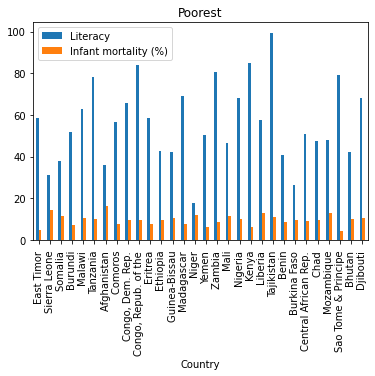

In [39]:
poorest.plot(x='Country', y=['Literacy','Infant mortality (%)'], kind='bar', title='Poorest')

In [65]:
full_countries_sr = full_countries.sort(col('GDP ($ per capita)').desc())
richest_countries_df = full_countries_sr.toPandas().head(30)

In [66]:
richest_countries_df

,Country,Literacy (%),Infant mortality (per 1000 births),GDP ($ per capita),Literacy,Infant mortality (%)
0,Luxembourg,"100,0","4,81",55100,100.000000,0.481
1,Norway,"100,0","3,7",37800,100.000000,0.370
2,United States,"97,0","6,5",37800,97.000000,0.650
3,Bermuda,"98,0","8,53",36000,98.000000,0.853
4,Cayman Islands,"98,0","8,19",35000,98.000000,0.819
5,San Marino,"96,0","5,73",34600,96.000000,0.573
6,Switzerland,"99,0","4,39",32700,99.000000,0.439
7,Denmark,"100,0","4,56",31100,100.000000,0.456
8,Iceland,"99,9","3,31",30900,99.900002,0.331
9,Austria,"98,0","4,66",30000,98.000000,0.466


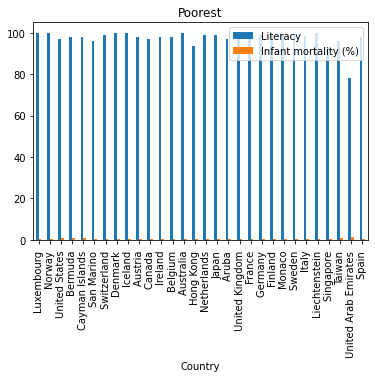

In [67]:
richest_countries_df.plot(x='Country', y=['Literacy','Infant mortality (%)'], kind='bar', title='Poorest')

In [70]:
many = poorest.append(richest_countries_df, ignore_index=True)

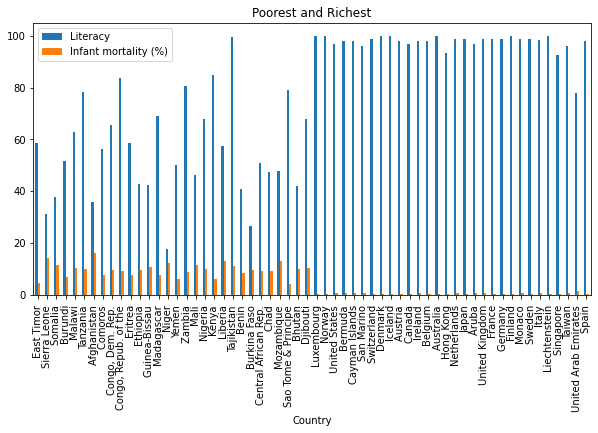

In [78]:
many.plot(x='Country', y=['Literacy','Infant mortality (%)'], kind='bar', title='Poorest and Richest', figsize=(10,5))

# Task 2
Wczytaj zbiór danych "airports.csv" ze strony https://www.kaggle.com/jonatancr/airports (zawiera on dane na temat lotnisk z całego świata). Ponieważ w zbiorze tym nie ma nagłówka, nadaj własne nazwy kolumnom, korzystając z opisu pliku na stronie https://openflights.org/data.html. Narysuj na wykresie (mapie) położenia wszystkich/wybranych lotnisk.



In [79]:
airports_path= '/content/drive/MyDrive/ADZD/airports.csv'  

In [164]:
airports = spark.read.csv(airports_path,header=False, inferSchema=False)
airports = airports.toDF('AirportID', 'name', 'city', 'Country', 'IATA', 'ICAO', 'latitude', 'longitude', 'altitude', 'timezone', 'DST', 'tz_database', 'Type', 'Source')

print(airports.show())

+---------+--------------------+--------------+----------------+----+----+------------------+-------------------+--------+--------+---+--------------------+-------+-----------+
|AirportID|                name|          city|         Country|IATA|ICAO|          latitude|          longitude|altitude|timezone|DST|         tz_database|   Type|     Source|
+---------+--------------------+--------------+----------------+----+----+------------------+-------------------+--------+--------+---+--------------------+-------+-----------+
|        1|      Goroka Airport|        Goroka|Papua New Guinea| GKA|AYGA|-6.081689834590001|      145.391998291|    5282|      10|  U|Pacific/Port_Moresby|airport|OurAirports|
|        2|      Madang Airport|        Madang|Papua New Guinea| MAG|AYMD|    -5.20707988739|      145.789001465|      20|      10|  U|Pacific/Port_Moresby|airport|OurAirports|
|        3|Mount Hagen Kagam...|   Mount Hagen|Papua New Guinea| HGU|AYMH|-5.826789855957031| 144.29600524902344|  

In [165]:
# airports_xy = airports.select('Country', 'Literacy (%)', 'Infant mortality (per 1000 births)', 'GDP ($ per capita)').na.drop()
airports_xy_df = airports.withColumn("Lattitude", float_udf("latitude")).withColumn("Longitude", float_udf("longitude")).select('Lattitude', 'Longitude').toPandas()

In [166]:
airports_xy_df

,Lattitude,Longitude
0,-6.081690,145.391998
1,-5.207080,145.789001
2,-5.826790,144.296005
3,-6.569803,146.725983
4,-9.443380,147.220001
...,...,...
7179,32.257885,120.501656
7180,31.390600,118.408997
7181,42.911701,90.247498
7182,40.542522,122.358597


In [167]:
longitudes = airports_xy_df['Longitude'].values.tolist()
lattitudes = airports_xy_df['Lattitude'].values.tolist()

In [168]:
# !pip install cartopy

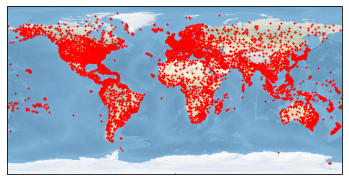

In [169]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()

plt.scatter(longitudes, lattitudes, s=1, color='red')
plt.show()

# Task 3
Utwórz dwie nowe kolumny w ramce "Countries", w których powierzchnia i gęstość zaludnienia wyrażone sa odpowiednio w milach kwadratowych i osobach na milę kwadratową
- Nazwy nowych kolumn proszę ustawić odpowiednio na 'Area (sq mi)' oraz 'Pop Density (per sq mi)'
- Uwaga: Typami nowych kolumn mają być odpowiednio integer (powierzchnia) i float (gęstość). Zaokrąglanie do integer: "int(x)"

Obecnie powierzchnia państw jest podana w km kwadratowych, a liczba ludności w os/km kw

1 sq km = 0.386102 sq mi

In [142]:
def to_miles(elem):
  return int(float(elem * 0.38))

In [143]:
miles_udf = udf(to_miles, IntegerType())

Poniższa funkcja była zmieniana, żeby dopasować dane krajów w celu joina

In [284]:
import re

In [411]:
def clear_string(elem):
  elem = elem.strip()
  elem = elem.replace(' and ', ' & ')
  elem = elem.replace(' And ', ' & ')
  elem = re.sub('Island(s)?', 'Is', elem, flags=re.IGNORECASE)
  elem = re.sub('Is(l|ls|\.)?', 'Is', elem, flags=re.IGNORECASE)
  elem = elem.replace(', Fed. St.', '')
  elem = elem.replace(', The', '')
  elem = elem.replace('Korea, North', 'North Korea')
  elem = elem.replace('Korea, South', 'South Korea')
  elem = elem.replace('Congo, Repub. of the', 'Congo (Brazzaville)')
  elem = elem.replace('Congo, Dem. Rep.', 'Congo (Kinshasa)')
  elem = elem.replace('Rep.', 'Republic')
  elem = elem.replace('N.', 'Northern')
  elem = elem.replace('St', 'Saint')
  return elem

In [412]:
string_udf = udf(clear_string, StringType())

In [413]:
countries_min = countries.withColumn("Area (sq mi)", miles_udf("`Area (sq. mi.)`")) 
countries_min = countries_min.withColumn("Pop Density (per sq mi)", countries["Population"] / countries_min["Area (sq mi)"])
countries_min = countries_min.withColumn("Country cleaned", string_udf('Country'))
countries_min = countries_min.select('Country cleaned', 'Region', 'Area (sq mi)', 'Pop Density (per sq mi)')

In [414]:
countries_min.show()

+-----------------+--------------------+------------+-----------------------+
|  Country cleaned|              Region|Area (sq mi)|Pop Density (per sq mi)|
+-----------------+--------------------+------------+-----------------------+
|      AfghanIstan|ASIA (EX. NEAR EA...|      246050|     126.22230034545824|
|          Albania|EASTERN EUROPE   ...|       10924|      327.8702856096668|
|          Algeria|NORTHERN AFRICA  ...|      905061|      36.38438845558476|
|   American Samoa|OCEANIA          ...|          75|      770.5866666666667|
|          Andorra|WESTERN EUROPE   ...|         177|     402.26553672316385|
|           Angola|SUB-SAHARAN AFRIC...|      473746|      25.59825518315722|
|         Anguilla|LATIN AMER. & CAR...|          38|      354.6578947368421|
|Antigua & Barbuda|LATIN AMER. & CAR...|         168|     411.35714285714283|
|        Argentina|LATIN AMER. & CAR...|     1051418|      37.96951640546386|
|          Armenia|C.W. OF IND. STATES |       11324|      262.8

# Task 4
Na wykresie scatterplot narysuj zależność liczby lotnisk od powierzchni kraju.
- Dane potrzebne do wykresu są w dwóch ramkach (Countries i Airports), konieczne więc będzie ich złączenie (join).
- Nie zawsze nazwy tych samych krajów będą identyczne w obu ramkach, co może stanowić problem (złączenie nie powstanie). Zastanów się jak przy pomocy mechanizmu złączeń wykryć, które nazwy się różnią. Stwórz odpowiednią ramkę, która zawiera takie nazwy.
- Następnie zmień nazwy kilku największych państw w jednej z ramek, tak żeby ujednolicić nazwy. Można to zrobić funkcją replace.

In [415]:
airports_countries = airports.select('Country', 'name').groupBy('Country').count()
airports_countries = airports_countries.withColumn('AirCountry', string_udf('Country')).select('AirCountry', 'count')

In [416]:
airports_countries.show()

+--------------------+-----+
|          AirCountry|count|
+--------------------+-----+
|                Chad|    6|
|            Paraguay|    8|
|            Anguilla|    1|
|              Russia|  238|
|BritIsh Indian Oc...|    1|
|               Yemen|   11|
|             Senegal|    9|
|              Sweden|   77|
|            Kiribati|   18|
|              Guyana|   13|
|              Jersey|    1|
|         Philippines|   64|
|               Burma|   43|
|             Eritrea|    3|
|               Tonga|    6|
|          Norfolk Is|    1|
|            Djibouti|    3|
|            Malaysia|   40|
|           Singapore|    6|
|                Fiji|   17|
+--------------------+-----+
only showing top 20 rows



In [417]:
airports_countries.count()  

237

In [418]:
countries.count() 

227

In [419]:
df = countries_min.join(airports_countries, countries_min['Country cleaned'] == airports_countries['AirCountry'], how='outer')

In [420]:
df.show()

+-----------------+--------------------+------------+-----------------------+-----------------+-----+
|  Country cleaned|              Region|Area (sq mi)|Pop Density (per sq mi)|       AirCountry|count|
+-----------------+--------------------+------------+-----------------------+-----------------+-----+
|      AfghanIstan|ASIA (EX. NEAR EA...|      246050|     126.22230034545824|      AfghanIstan|   20|
|          Albania|EASTERN EUROPE   ...|       10924|      327.8702856096668|          Albania|    5|
|          Algeria|NORTHERN AFRICA  ...|      905061|      36.38438845558476|          Algeria|   43|
|   American Samoa|OCEANIA          ...|          75|      770.5866666666667|   American Samoa|    2|
|          Andorra|WESTERN EUROPE   ...|         177|     402.26553672316385|             null| null|
|           Angola|SUB-SAHARAN AFRIC...|      473746|      25.59825518315722|           Angola|   24|
|         Anguilla|LATIN AMER. & CAR...|          38|      354.6578947368421|     

In [421]:
df.filter(col('Country cleaned').isNull() | col('AirCountry').isNull()).show(df.count(), False)

+---------------+-----------------------------------+------------+-----------------------+------------------------------+-----+
|Country cleaned|Region                             |Area (sq mi)|Pop Density (per sq mi)|AirCountry                    |count|
+---------------+-----------------------------------+------------+-----------------------+------------------------------+-----+
|Andorra        |WESTERN EUROPE                     |177         |402.26553672316385     |null                          |null |
|null           |null                               |null        |null                   |Antarctica                    |7    |
|null           |null                               |null        |null                   |BritIsh Indian Ocean Territory|1    |
|null           |null                               |null        |null                   |ChrIstmas Is                  |1    |
|null           |null                               |null        |null                   |Cocos (Keeling

Co powoduje problemy:
 - Is zamiast Islands
 - & zamiast and
 - , The w Bahamach i Gambii
 - South Korea i Korea, South

In [427]:
area_airports = df.na.drop()

In [428]:
area_airports_df = area_airports.toPandas()

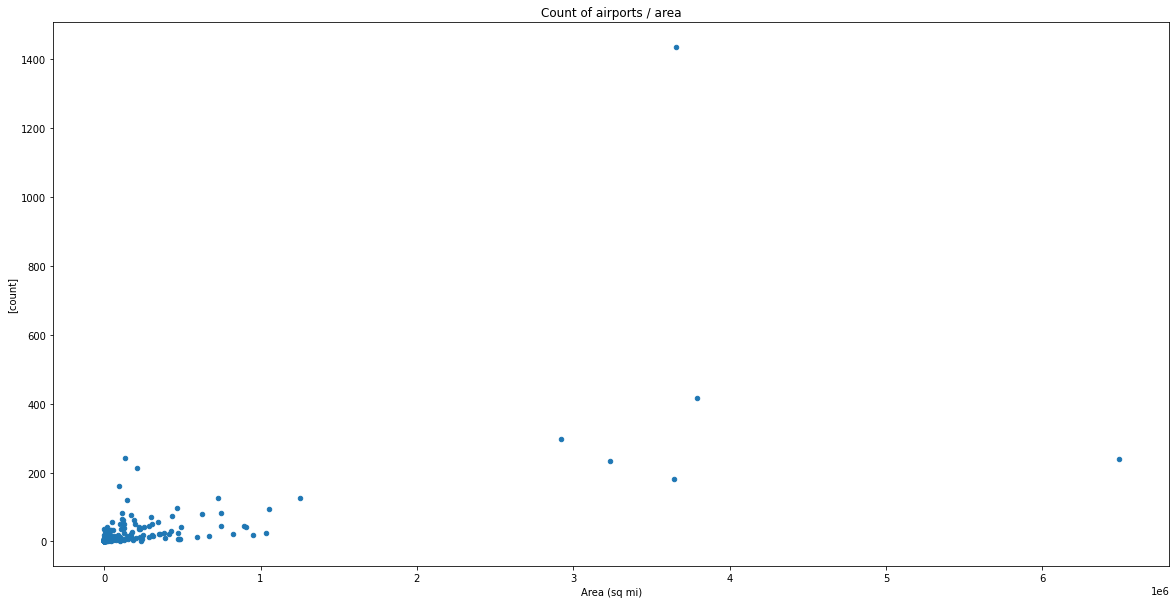

In [438]:
area_airports_df.plot(x='Area (sq mi)', y=['count'], kind='scatter', title='Count of airports / area', figsize=(20,10))

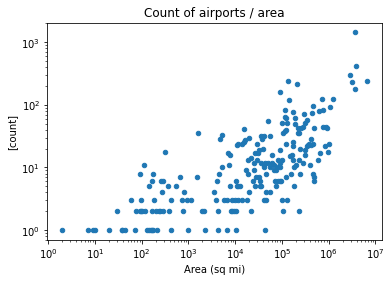

In [439]:
area_airports_df.plot(x='Area (sq mi)', y=['count'], kind='scatter', title='Count of airports / area', logx=True, logy=True)

# Task 5
Oblicz, ile lotnisk jest na poszczególnych kontynentach. To zadanie również wymaga złączenia ramek "Countries" i "Airports". Wynik przedstaw na wykresie słupkowym.
- Do ramki "Countries" dodaj nową kolumnę "Continent" (według klasyfikacji Africa, Asia, Europe, North America, South America, Antarctica, Australia/Oceania).
- Skorzystaj z kolumny "Region" i pomocniczej funkcji (UDF) mapującej region na kontynent.

C.W. OF IND. STATES - to Azja lub Europa, ale głównie Azja, więc oznaczam jako Asia,

podobnie NEAR EAST - głównie Azja

In [496]:
def select_continent(elem):
  elem = elem.lower()
  if any(word in elem for word in ['africa']):
    return 'Africa'
  if any(word in elem for word in ['asia', 'c.w. of ind. states', 'near east']):
    return 'Asia'
  if any(word in elem for word in ['europe', 'baltics']):
    return 'Europe'
  if any(word in elem for word in ['northern america']):
    return 'North America'
  if any(word in elem for word in ['latin amer.']):
    return 'South America'
  if any(word in elem for word in ['antarctica']):
    return 'Antarctica'
  if any(word in elem for word in ['australia', 'oceania']):
    return 'Australia/Oceania'
  return 'Other'

In [497]:
continent_udf = udf(select_continent, StringType())

In [498]:
countries_cont = countries_min.withColumn("Continent", continent_udf('Region')) \
  .select('Country cleaned', 'Continent')

In [499]:
countries_cont.show()

+-----------------+-----------------+
|  Country cleaned|        Continent|
+-----------------+-----------------+
|      AfghanIstan|             Asia|
|          Albania|           Europe|
|          Algeria|           Africa|
|   American Samoa|Australia/Oceania|
|          Andorra|           Europe|
|           Angola|           Africa|
|         Anguilla|    South America|
|Antigua & Barbuda|    South America|
|        Argentina|    South America|
|          Armenia|             Asia|
|            Aruba|    South America|
|        Australia|Australia/Oceania|
|          Austria|           Europe|
|       Azerbaijan|             Asia|
|          Bahamas|    South America|
|          Bahrain|             Asia|
|       Bangladesh|             Asia|
|         Barbados|    South America|
|          Belarus|             Asia|
|          Belgium|           Europe|
+-----------------+-----------------+
only showing top 20 rows



In [500]:
countries_cont.filter(col('Continent') == 'Other').show()

+---------------+---------+
|Country cleaned|Continent|
+---------------+---------+
+---------------+---------+



In [533]:
cont_airports = countries_cont.join(airports_countries, countries_min['Country cleaned'] == airports_countries['AirCountry'], how='outer').na.drop()
cont_airports = cont_airports.withColumnRenamed('count', 'Airports')
cont_airports.show()

+-----------------+-----------------+-----------------+--------+
|  Country cleaned|        Continent|       AirCountry|Airports|
+-----------------+-----------------+-----------------+--------+
|      AfghanIstan|             Asia|      AfghanIstan|      20|
|          Albania|           Europe|          Albania|       5|
|          Algeria|           Africa|          Algeria|      43|
|   American Samoa|Australia/Oceania|   American Samoa|       2|
|           Angola|           Africa|           Angola|      24|
|         Anguilla|    South America|         Anguilla|       1|
|Antigua & Barbuda|    South America|Antigua & Barbuda|       2|
|        Argentina|    South America|        Argentina|      94|
|          Armenia|             Asia|          Armenia|       5|
|            Aruba|    South America|            Aruba|       1|
|        Australia|Australia/Oceania|        Australia|     296|
|          Austria|           Europe|          Austria|      19|
|       Azerbaijan|      

In [536]:
cont_airports.select('Continent', 'Airports').groupBy('Continent').agg(sum('Airports').alias('Airports in continent')).sort('Airports in continent').show()

+-----------------+---------------------+
|        Continent|Airports in continent|
+-----------------+---------------------+
|Australia/Oceania|                  549|
|           Africa|                  707|
|    South America|                  969|
|           Europe|                 1395|
|             Asia|                 1662|
|    North America|                 1877|
+-----------------+---------------------+

